In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define ranges for D and r
D_range = np.linspace(0.0001, 0.01, 10)  # Diffusion coefficient range
r_range = np.linspace(0.01, 0.1, 10)     # Reaction rate range
samples = 200                            # Number of samples

# Spatial and temporal parameters
L = 31.0  # Spatial domain size in mm
T = 50.0  # Temporal domain size in days
Nx, Ny, Nz = 31, 31, 31  # Number of spatial grid points
Nt = 1500  # Number of time steps

dx, dy, dz = L / (Nx - 1), L / (Ny - 1), L / (Nz - 1)
dt = T / Nt

# Create a grid of spatial points
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
z = np.linspace(0, L, Nz)
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')

# Define initial condition
A = 1.0
sigma = 2.0
n_max = 1.0
n0_template = A * np.exp(-(xx - L/2)**2 / (2 * sigma**2) - (yy - L/2)**2 / (2 * sigma**2) - (zz - L/2)**2 / (2 * sigma**2))

# Define Laplacian kernel
laplacian_kernel = np.array([[[0, 1, 0], [1, -6, 1], [0, 1, 0]],
                             [[1, 1, 1], [1, -6, 1], [1, 1, 1]],
                             [[0, 1, 0], [1, -6, 1], [0, 1, 0]]], dtype=float)

def update_n(n, dx, dy, dz, dt, D, r, n_max):
    laplacian_n = convolve(n, laplacian_kernel, mode='constant', cval=0)
    dn = D * laplacian_n + r * n * (1 - n / n_max)
    return n + dt * dn



In [2]:
# Create directories to save results
output_dir = "/home/wfarz001/Fall-2024_Project/Tumor_States"
initial_dir = os.path.join(output_dir, "Initial")
final_dir = os.path.join(output_dir, "Final")

os.makedirs(initial_dir, exist_ok=True)
os.makedirs(final_dir, exist_ok=True)

# Generate and save samples
np.random.seed(42)
for i in range(samples):
    D = np.random.uniform(D_range[0], D_range[-1])
    r = np.random.uniform(r_range[0], r_range[-1])
    n = n0_template.copy()
    
    # Time evolution
    for _ in range(Nt):
        n = update_n(n, dx, dy, dz, dt, D, r, n_max)
    
    # Save initial and final states
    initial_file = os.path.join(initial_dir, f"initial_D{D:.4f}_r{r:.4f}_sample{i}.npy")
    final_file = os.path.join(final_dir, f"final_D{D:.4f}_r{r:.4f}_sample{i}.npy")
    
    np.save(initial_file, n0_template)
    np.save(final_file, n)

    print(f"Saved sample {i + 1}/{samples}: D={D:.4f}, r={r:.4f}")

print("All samples generated and saved.")

Saved sample 1/200: D=0.0038, r=0.0956
Saved sample 2/200: D=0.0073, r=0.0639
Saved sample 3/200: D=0.0016, r=0.0240
Saved sample 4/200: D=0.0007, r=0.0880
Saved sample 5/200: D=0.0061, r=0.0737
Saved sample 6/200: D=0.0003, r=0.0973
Saved sample 7/200: D=0.0083, r=0.0291
Saved sample 8/200: D=0.0019, r=0.0265
Saved sample 9/200: D=0.0031, r=0.0572
Saved sample 10/200: D=0.0044, r=0.0362
Saved sample 11/200: D=0.0062, r=0.0226
Saved sample 12/200: D=0.0030, r=0.0430
Saved sample 13/200: D=0.0046, r=0.0807
Saved sample 14/200: D=0.0021, r=0.0563
Saved sample 15/200: D=0.0060, r=0.0142
Saved sample 16/200: D=0.0061, r=0.0253
Saved sample 17/200: D=0.0007, r=0.0954
Saved sample 18/200: D=0.0097, r=0.0828
Saved sample 19/200: D=0.0031, r=0.0188
Saved sample 20/200: D=0.0069, r=0.0496
Saved sample 21/200: D=0.0013, r=0.0546
Saved sample 22/200: D=0.0004, r=0.0918
Saved sample 23/200: D=0.0027, r=0.0696
Saved sample 24/200: D=0.0032, r=0.0568
Saved sample 25/200: D=0.0055, r=0.0266
Saved sam

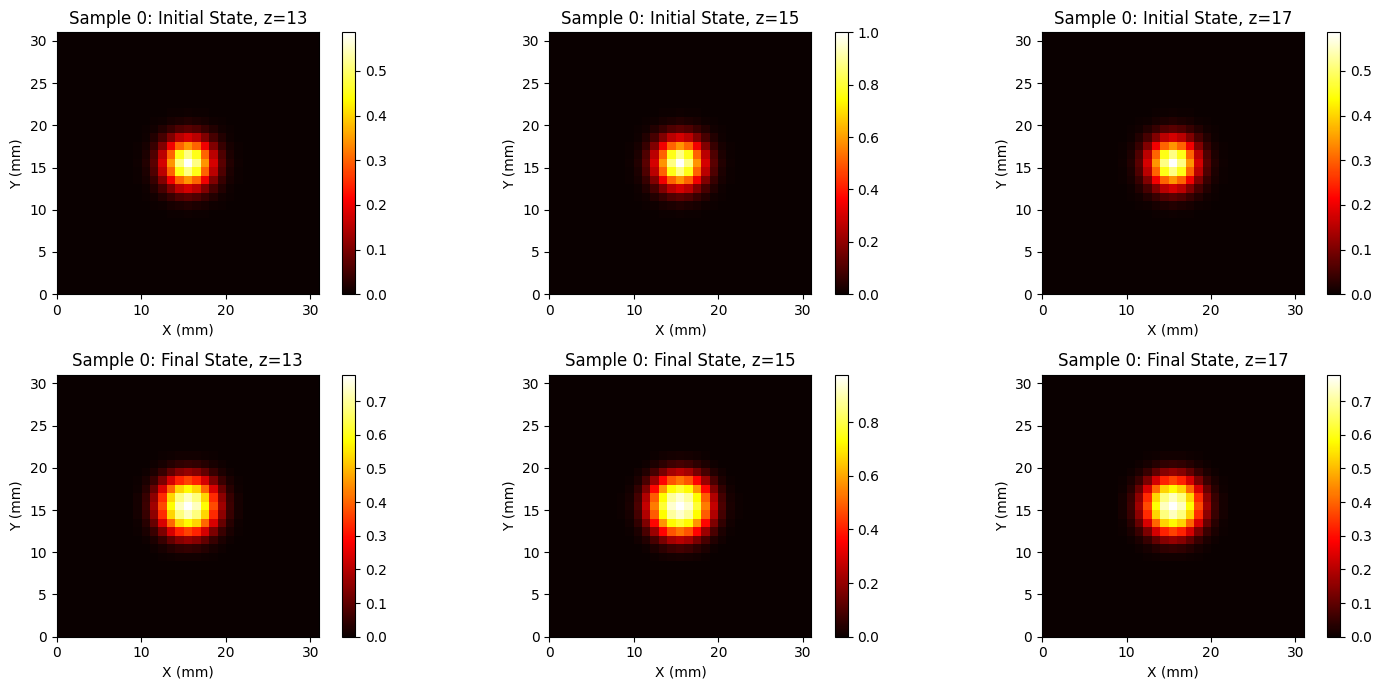

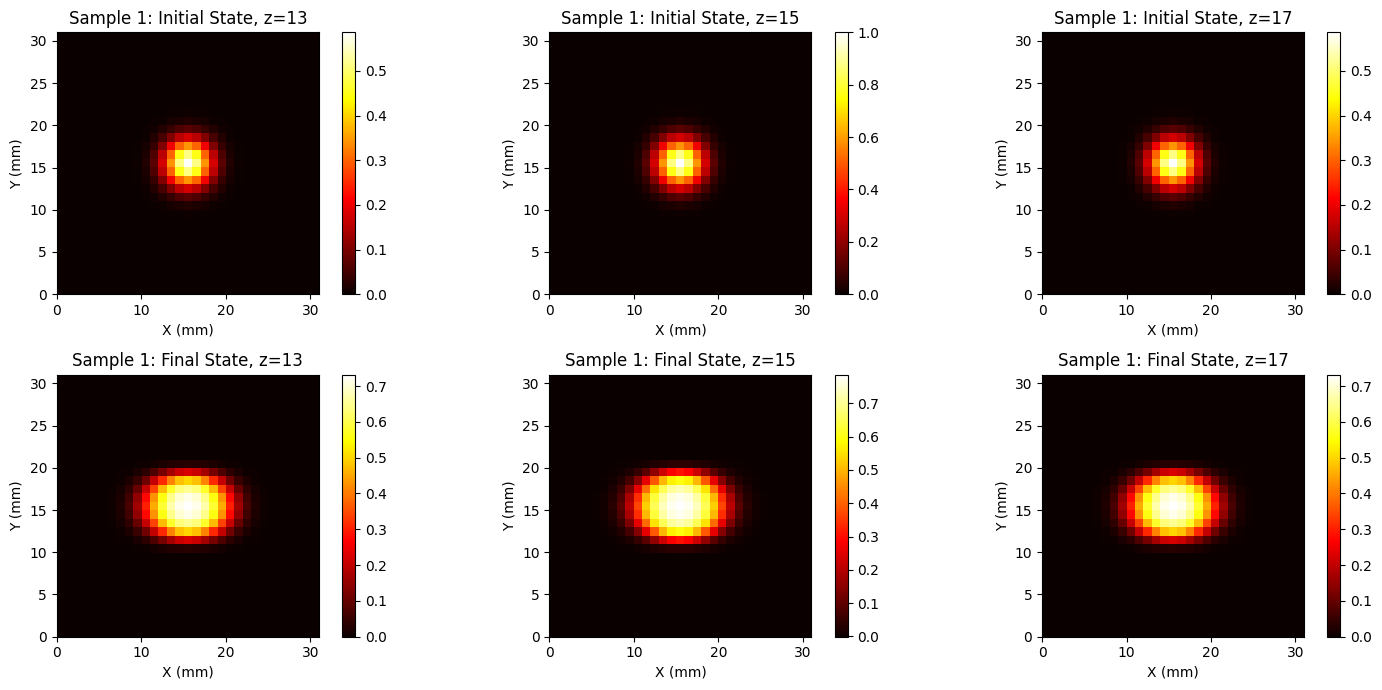

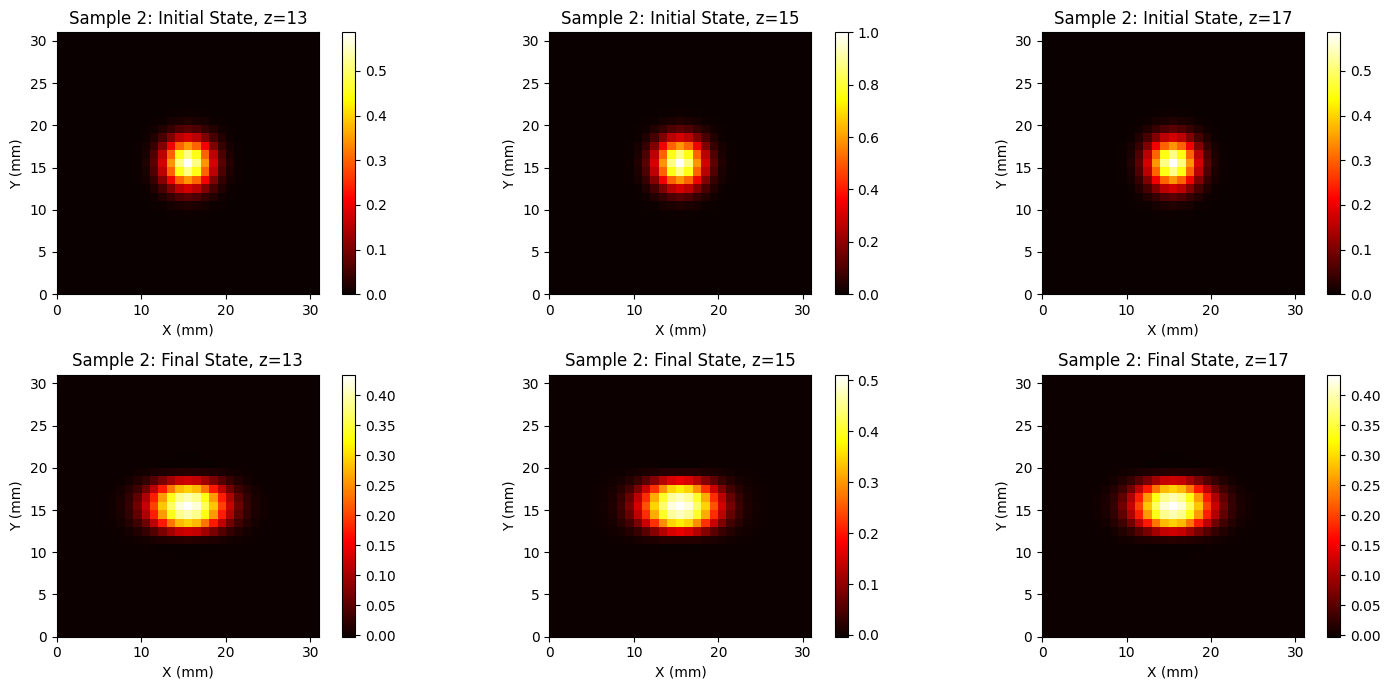

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Directories containing initial and final state .npy files
initial_dir = "/home/wfarz001/Fall-2024_Project/Tumor_States/Initial"
final_dir = "/home/wfarz001/Fall-2024_Project/Tumor_States/Final"

# Load a few samples
sample_indices = [0, 100, 150]  # Indices of samples to visualize
initial_files = sorted(os.listdir(initial_dir))  # Sort the files
final_files = sorted(os.listdir(final_dir))

# Ensure you're accessing specific files using the indices
initial_samples = [np.load(os.path.join(initial_dir, initial_files[i])) for i in sample_indices]
final_samples = [np.load(os.path.join(final_dir, final_files[i])) for i in sample_indices]

# Visualization function
def visualize_samples(initial_samples, final_samples, z_slices):
    """
    Visualize initial and final states for given z-slices.
    """
    for idx, (initial, final) in enumerate(zip(initial_samples, final_samples)):
        fig, axes = plt.subplots(2, len(z_slices), figsize=(15, 7))
        for i, z in enumerate(z_slices):
            # Plot initial state
            im1 = axes[0, i].imshow(initial[:, :, z], extent=[0, 31, 0, 31], origin='lower', cmap='hot')
            axes[0, i].set_title(f'Sample {idx}: Initial State, z={z}')
            axes[0, i].set_xlabel('X (mm)')
            axes[0, i].set_ylabel('Y (mm)')
            plt.colorbar(im1, ax=axes[0, i])

            # Plot final state
            im2 = axes[1, i].imshow(final[:, :, z], extent=[0, 31, 0, 31], origin='lower', cmap='hot')
            axes[1, i].set_title(f'Sample {idx}: Final State, z={z}')
            axes[1, i].set_xlabel('X (mm)')
            axes[1, i].set_ylabel('Y (mm)')
            plt.colorbar(im2, ax=axes[1, i])

        plt.tight_layout()
        plt.show()

# Specify z-slices to visualize
z_slices = [13, 15, 17]

# Visualize the slices for each sample
visualize_samples(initial_samples, final_samples, z_slices)


In [ ]:
#save the plots###

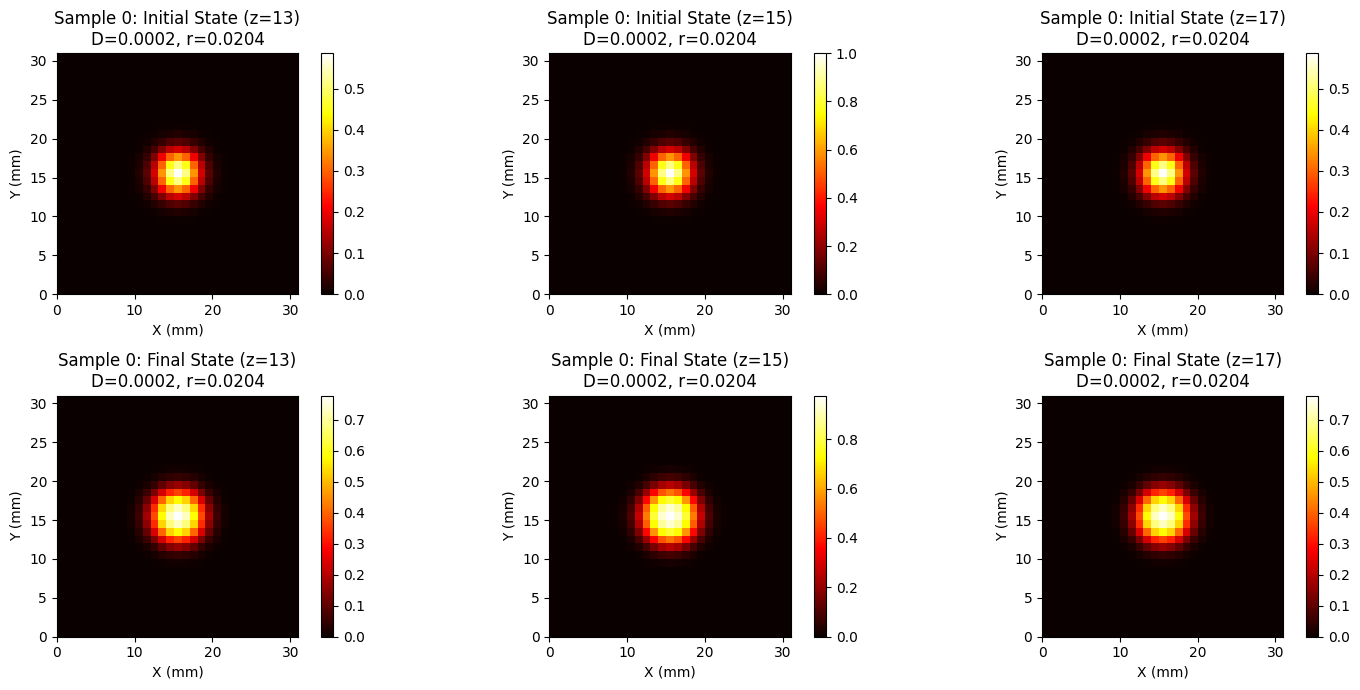

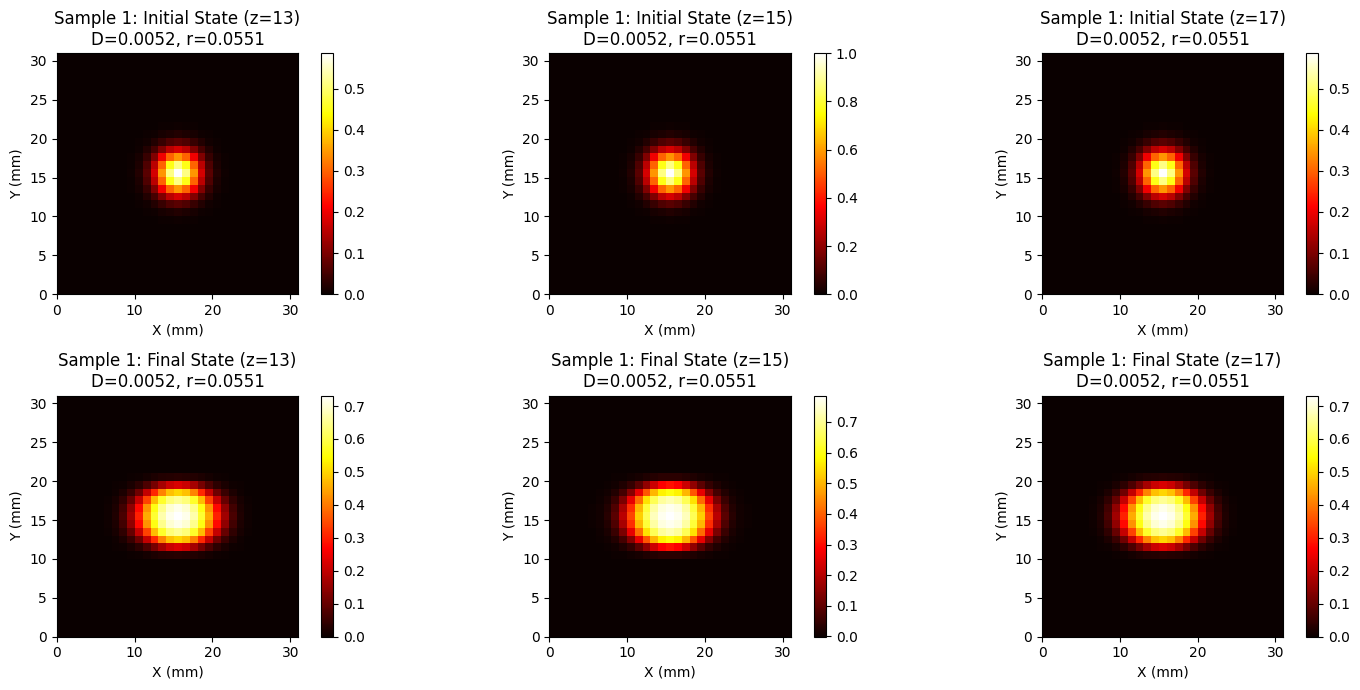

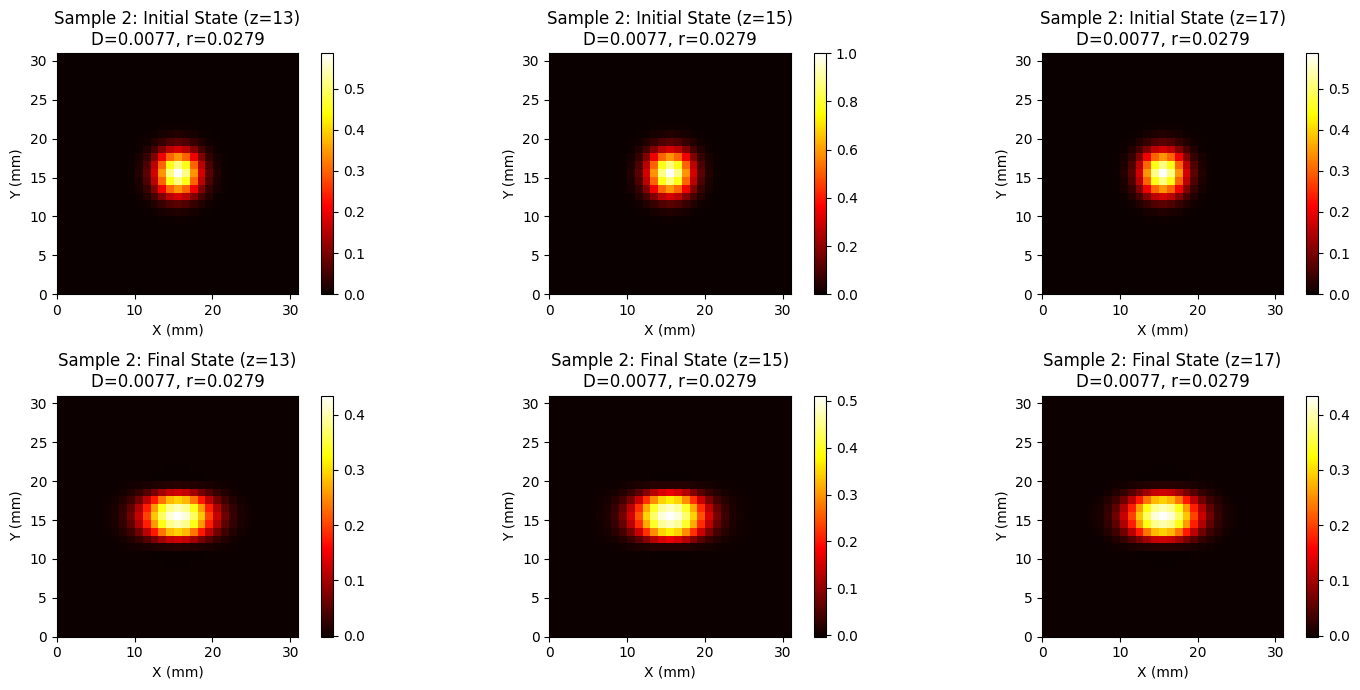

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Directories containing initial and final state .npy files
initial_dir = "/home/wfarz001/Fall-2024_Project/Tumor_States/Initial"
final_dir = "/home/wfarz001/Fall-2024_Project/Tumor_States/Final"

# Load a few samples
sample_indices = [0, 100, 150]  # Indices of samples to visualize
initial_files = sorted(os.listdir(initial_dir))  # Sort the files
final_files = sorted(os.listdir(final_dir))

# Ensure you're accessing specific files using the indices
initial_samples = [np.load(os.path.join(initial_dir, initial_files[i])) for i in sample_indices]
final_samples = [np.load(os.path.join(final_dir, final_files[i])) for i in sample_indices]

# Corresponding D and r values for the samples
# Assuming D and r values are stored in the filenames like "D_0.001_r_0.05_initial.npy"
def extract_params(filename):
    """
    Extract D and r values from the filename.
    Assumes the filename format contains 'D' and 'r' followed by their values, e.g., 'D0.0002_r0.05_initial.npy'.
    """
    parts = filename.split('_')
    D = float(parts[1][1:])  # Remove 'D' and convert to float
    r = float(parts[2][1:])  # Remove 'r' and convert to float
    return D, r

params = [extract_params(initial_files[i]) for i in sample_indices]

# Visualization function
def visualize_samples(initial_samples, final_samples, z_slices, params):
    """
    Visualize initial and final states for given z-slices.
    """
    for idx, (initial, final, (D, r)) in enumerate(zip(initial_samples, final_samples, params)):
        fig, axes = plt.subplots(2, len(z_slices), figsize=(15, 7))
        for i, z in enumerate(z_slices):
            # Plot initial state
            im1 = axes[0, i].imshow(initial[:, :, z], extent=[0, 31, 0, 31], origin='lower', cmap='hot')
            axes[0, i].set_title(f'Sample {idx}: Initial State (z={z})\nD={D}, r={r}')
            axes[0, i].set_xlabel('X (mm)')
            axes[0, i].set_ylabel('Y (mm)')
            plt.colorbar(im1, ax=axes[0, i])

            # Plot final state
            im2 = axes[1, i].imshow(final[:, :, z], extent=[0, 31, 0, 31], origin='lower', cmap='hot')
            axes[1, i].set_title(f'Sample {idx}: Final State (z={z})\nD={D}, r={r}')
            axes[1, i].set_xlabel('X (mm)')
            axes[1, i].set_ylabel('Y (mm)')
            plt.colorbar(im2, ax=axes[1, i])

        plt.tight_layout()
        # Save the figure as PNG
        output_filename = f"/home/wfarz001/Fall-2024_Project/sample_{idx}_D_{D}_r_{r}.png"
        plt.savefig(output_filename, dpi=300)
        plt.show()

# Specify z-slices to visualize
z_slices = [13, 15, 17]

# Visualize the slices for each sample and save plots
visualize_samples(initial_samples, final_samples, z_slices, params)
